In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
#ускорение свободного падения
g=1
#средняя высота
H_= 1
#вязкое трение
b=0
#параметр Кориолиса
f=0
Nx=51
Ny=51
Nt=10000
dt = 0.001
h = np.zeros((Nx,Ny))
u = np.zeros((Nx,Ny))
v = np.zeros((Nx,Ny))
#for i in range(Nx):
#    for j in range(Ny):
#        h[i][j] = (Nx*Ny/2/100 - (Nx/2-i)*(Nx/2-i)/100 - (Nx/2-j)*(Nx/2-j)/100)
for i in range(Nx):
    for j in range(Ny):
        if i>= Nx/4 and j>= Ny/4 and i<=3*Nx/4 and j<= 3*Ny/4:
            h[i][j] = np.abs((i-Nx/4)*(j-Ny/4)*(i-Nx*3/4)*(j-3*Ny/4))/(Nx*Ny)
        else: h[i][j]=0

In [4]:
def periodic_derive_x(h,delta,Nx,Ny):
    hx=np.zeros((Nx,Ny))
    hx[0,:] = (h[1,:] - h[-1,:]) / (2 * delta)
    hx[1:(Nx-1),:] = (h[2:Nx,:] - h[0:(Nx-2),:]) / (2 * delta)
    hx[Nx-1,:] = (h[0,:] - h[Nx-2,:]) / (2 * delta)
    
    return hx

def periodic_derive_y(h,delta,Nx,Ny):
    hy=np.zeros((Nx,Ny))
    hy[:,0] = (h[:,1] - h[:,-1]) / (2 * delta)
    hy[:,1:(Ny-1)]= (h[:,2:Ny] - h[:,0:(Ny-2)]) / (2 * delta)
    hy[:,Ny-1] = (h[:,0] - h[:,Ny-2]) / (2 * delta)
    
    return hy

def cooler_periodic_derive_x(h,delta,Nx,Ny):
    hx=np.zeros((Nx,Ny))
    hx[0,:] = (h[-2,:] - 8*h[-1,:] + 8* h[1,:] - h[2,:]) / (12 * delta)
    hx[1,:] = (h[-1,:] - 8*h[0,:] + 8* h[2,:] - h[3,:]) / (12 * delta)
    hx[2:(Nx-2),:] = (h[0:(Nx-4),:] - 8*h[1:(Nx-3),:] +8*h[3:(Nx-1),:] - h[4:Nx,:]) / (12 * delta)
    hx[(Nx-2),:] = (h[(Nx-4),:] - 8*h[(Nx-3),:] +8*h[(Nx-1),:] - h[0,:]) / (12 * delta)
    hx[Nx-1,:] = (h[Nx-3,:] - 8*h[Nx-2,:] +8*h[0,:] - h[1,:]) / (12 * delta)
    return hx

def cooler_periodic_derive_y(h,delta,Nx,Ny):
    hy=np.zeros((Nx,Ny))
    hy[:,0] = (h[:,-2] - 8*h[:,-1] + 8* h[:,1] - h[:,2]) / (12 * delta)
    hy[:,1] = (h[:,-1] - 8*h[:,0] + 8* h[:,2] - h[:,3]) / (12 * delta)
    hy[:,2:(Ny-2)] = (h[:,0:(Ny-4)] - 8*h[:,1:(Ny-3)] +8*h[:,3:(Ny-1)] - h[:,4:Nx]) / (12 * delta)
    hy[:,(Ny-2)] = (h[:,(Ny-4)] - 8*h[:,(Ny-3)] +8*h[:,(Nx-1)] - h[:,0]) / (12 * delta)
    hy[:,Ny-1] = (h[:,Ny-3] - 8*h[:,Ny-2] +8*h[:,0] - h[:,1]) / (12 * delta)
    
    return hy


def stupid_scheme_step(u,v,h,Nx,Ny,dt,Nt,g=1,H_=1,b=0.01,f=0):
    dx = 1/Nx
    dy = 1/Ny
    u_new = u.copy()
    v_new = v.copy()
    h_new = h.copy()
    #производные через центральные разности 
    hx = cooler_periodic_derive_x(h,dx,Nx,Ny)
    hy = cooler_periodic_derive_y(h,dy,Nx,Ny)
    ux = cooler_periodic_derive_x(u,dx,Nx,Ny)
    vy = cooler_periodic_derive_y(v,dy,Nx,Ny)
    #новые значения скоростей
    u_new = u - g * dt * hx-b*u+f*v
    v_new = v - g * dt * hy-b*v-f*u
    #новые производные
    u_newx = cooler_periodic_derive_x(u_new,dx,Nx,Ny)
    v_newy = cooler_periodic_derive_y(v_new,dy,Nx,Ny)
    #и наконец новая высота
    h_new = h - H_ * dt * (u_newx + v_newy)
    return u_new,v_new,h_new

def stupid_scheme(u,v,h,Nx,Ny,dt,Nt,g=1,H_=1,b=0.01,f=0):
    h_new = []
    u1,v1,h1 = u.copy(),v.copy(),h.copy()
    h_new.append(h.copy())
    for i in range(Nt):
        u1,v1,h1 = stupid_scheme_step(u1,v1,h1,Nx,Ny,dt,Nt,g,H_,f,b)
        h_new.append(h1.copy())
    return h_new,u1,v1

In [5]:
H,u1,v1 = stupid_scheme(u,v,h,Nx,Ny,dt,Nt,g,H_,f,b)

<IPython.core.display.Javascript object>


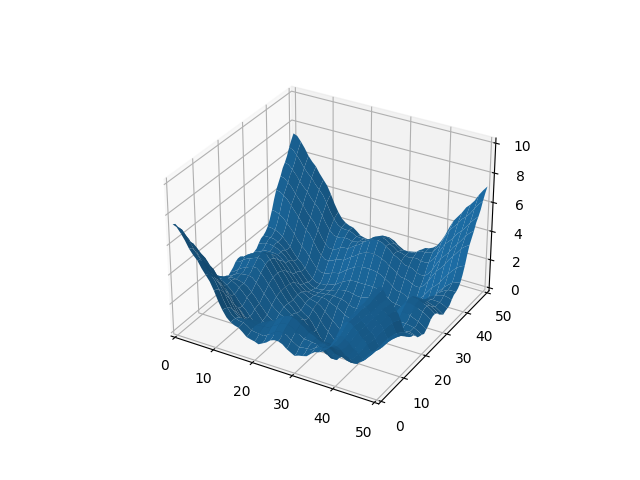

In [6]:
from mpl_toolkits.mplot3d import Axes3D
b = range(0,Nx,1)
d = range(0,Ny,1)
%matplotlib notebook
B, D = np.meshgrid(b, d)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(0, Nx-1)
ax.set_ylim(0, Ny-1)
ax.set_zlim(np.min(H[0]), np.max(H[0]))
def animate2(i):
    ax.clear()
    ax.set_xlim(0, Nx-1)
    ax.set_ylim(0, Ny-1)
    ax.set_zlim(0, np.max(H[0]))
    surf = ax.plot_surface(B, D, H[10*i],vmin = np.min(H[0]), vmax = np.max(H[0]),norm=True)
ani = FuncAnimation(fig=fig, func=animate2, frames=10000, interval=0.1, repeat=False)
#ani.save("shallow_water_ani.gif")
plt.show()

In [32]:
#fig = plt.figure(figsize=(6, 4))
#x = fig.add_subplot(111)
#_d, = ax.plot([], [], linewidth=2.5)
#ef animate1(i):
#   ax.imshow(H[2*i],vmin = np.min(H[0]), vmax = np.max(H[0]))
#ni = FuncAnimation(fig=fig, func=animate1, frames=200, interval=0.5, repeat=True)
#lt.show()

<IPython.core.display.Javascript object>


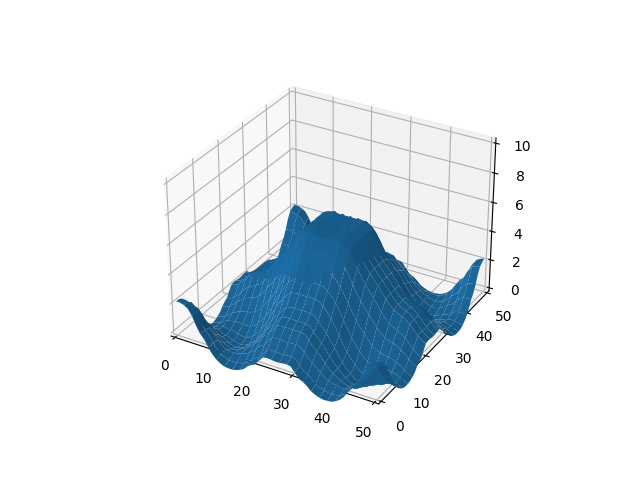

In [8]:
b = range(0,Nx,1)
d = range(0,Ny,1)
%matplotlib notebook
B, D = np.meshgrid(b, d)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(0, Nx-1)
ax.set_ylim(0, Ny-1)
ax.set_zlim(np.min(H[0]), np.max(H[0]))
ax.plot_surface(B, D, H[9998],vmin = np.min(H[0]), vmax = np.max(H[0]),norm=True)